**WINE QUALITY DATSET (By Subashree Venkatesan Sundharesan)**




This dataset is often used for regression and classification tasks to predict wine quality based on the physicochemical properties.

The Wine Quality dataset includes the following features:

1. **fixed acidity**: The amount of non-volatile acids in the wine, primarily tartaric acid.
2. **volatile acidity**: The amount of acetic acid in the wine, which at high levels can lead to an unpleasant vinegar taste.
3. **citric acid**: The amount of citric acid present, which can add freshness and flavor to the wine.
4. **residual sugar**: The amount of sugar remaining after fermentation stops. Wines with more than 45 g/L of sugar are considered sweet.
5. **chlorides**: The amount of salt in the wine.
6. **free sulfur dioxide**: The level of free form of SO2, which prevents microbial growth and oxidation.
7. **total sulfur dioxide**: The total amount of SO2, both free and bound, in the wine.
8. **density**: The density of the wine, which is closely related to the alcohol and sugar content.
9. **pH**: The measure of acidity or basicity of the wine.
10. **sulphates**: A wine additive that can contribute to the wine's sulfur dioxide levels and acts as an antioxidant and preservative.
11. **alcohol**: The alcohol content of the wine (in % by volume).
12. **quality**: The quality score of the wine, given by wine tasters (scale of 0 to 10).
13. **Id**: An identifier for each wine sample.

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [147]:
# Load the Wine Quality dataset
data = pd.read_csv('/content/WineQT.csv')

**Question 1**: Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? [2 points]

In [148]:
data.shape

(1143, 13)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [150]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [151]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

**Wine Quality Dataset Statistics**

**Fixed Acidity**:
- Mean: 8.3111, indicating a moderately high level of non-volatile acids in the wine.
- Std: 1.7476, showing a moderate variation in acidity levels.
- Max: 15.9, suggesting that some wines have very high fixed acidity.

**Volatile Acidity**:
- Mean: 0.5313, which indicates a moderate level of acetic acid.
- Std: 0.1796, showing moderate variability in acidity.
- Max: 1.58, indicating that some wines have a high vinegar-like taste.

**Citric Acid**:
- Mean: 0.2684, implying a relatively low presence of citric acid.
- Std: 0.1967, suggesting some wines have significantly higher or lower citric acid levels.
- Max: 1.0, showing that a few wines have very high citric acid.

**Residual Sugar**:
- Mean: 2.5322, indicating a moderate amount of residual sugar.
- Std: 1.3559, showing a considerable spread in sugar levels.
- Max: 15.5, meaning some wines are very sweet.

**Chlorides**:
- Mean: 0.0869, indicating a low amount of salt content.
- Std: 0.0473, showing moderate variation.
- Max: 0.611, suggesting some wines have a relatively high chloride content.

**Free Sulfur Dioxide**:
- Mean: 15.6155, reflecting moderate levels of free SO2.
- Std: 10.2505, indicating significant variation in this preservative's presence.
- Max: 68.0, showing some wines have very high levels.

**Total Sulfur Dioxide**:
- Mean: 45.9147, indicating a moderate overall level of sulfur dioxide.
- Std: 32.7821, suggesting a wide range in total SO2 levels.
- Max: 289.0, implying some wines have extremely high sulfur dioxide.

**Density**:
- Mean: 0.9967, showing density close to that of water.
- Std: 0.0019, indicating minimal variation in density.
- Max: 1.0037, suggesting only slight deviations from the mean.

**pH**:
- Mean: 3.3110, indicating the wine is generally acidic.
- Std: 0.1567, showing a moderate spread in pH values.
- Max: 4.01, with some wines being much less acidic.

**Sulphates**:
- Mean: 0.6577, reflecting moderate sulfur compounds that affect taste.
- Std: 0.1704, suggesting some variation in sulphate content.
- Max: 2.0, meaning some wines have very high sulphate levels.

**Alcohol**:
- Mean: 10.4421, indicating a moderate alcohol content.
- Std: 1.0822, showing a reasonable variation.
- Max: 14.9, meaning some wines have a high alcohol percentage.

**Quality**:
- Mean: 5.6570, showing that wines generally have a mid-range quality score.
- Std: 0.8058, indicating most scores are centered around the mean.
- Max: 8.0, suggesting that some wines are rated quite highly.

**Id**:
- Mean: 804.9694, providing the average identifier value across the dataset.
- Std: 463.9971, indicating a wide range of unique identifiers.
- Max: 1597, showing the highest identifier in the dataset.


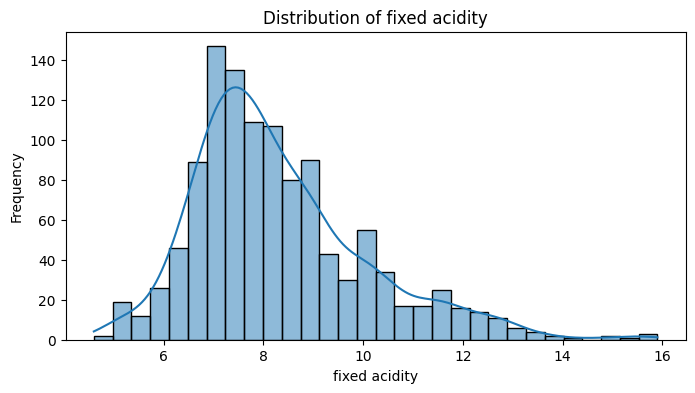

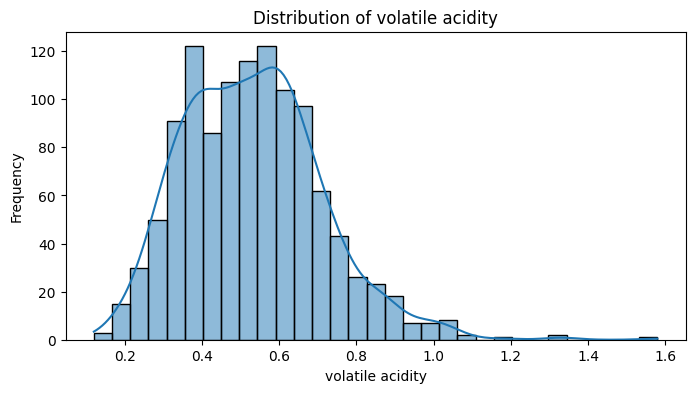

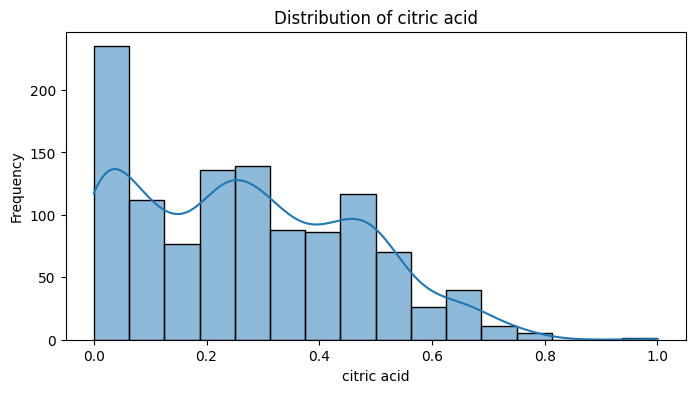

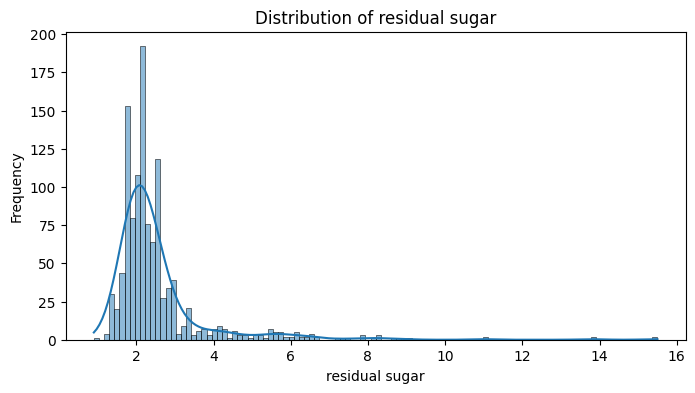

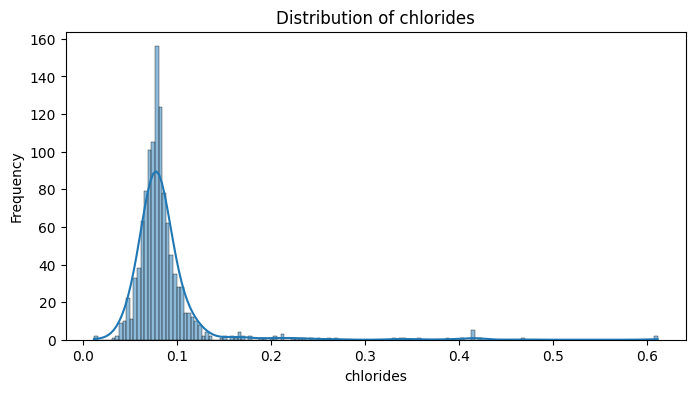

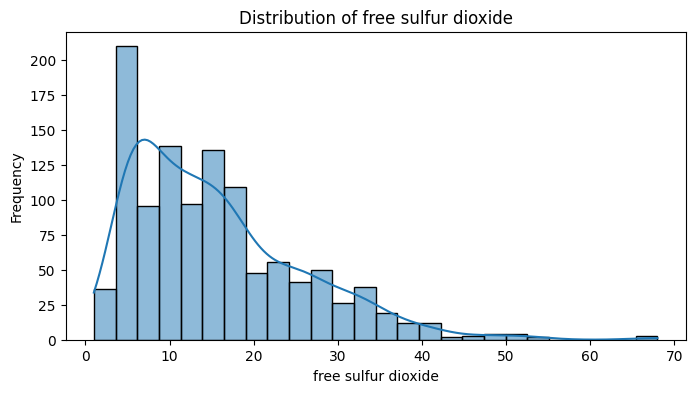

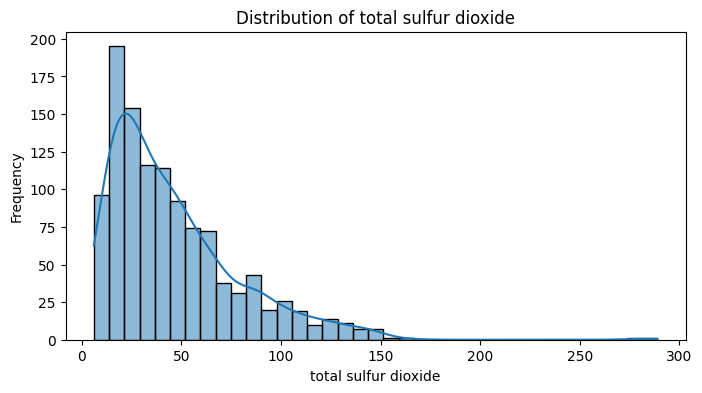

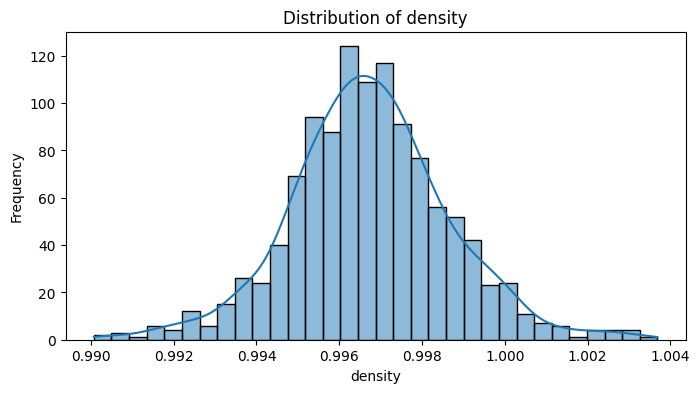

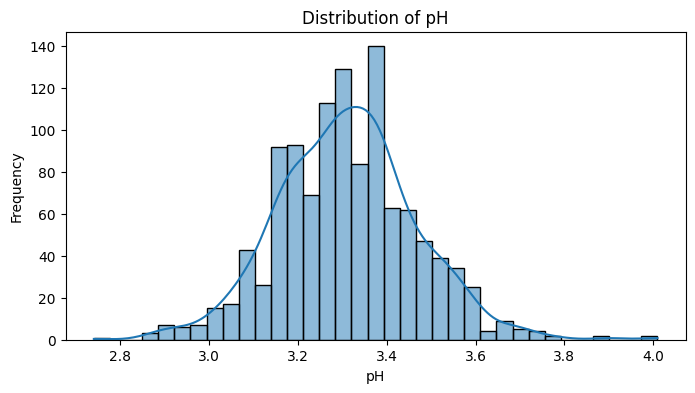

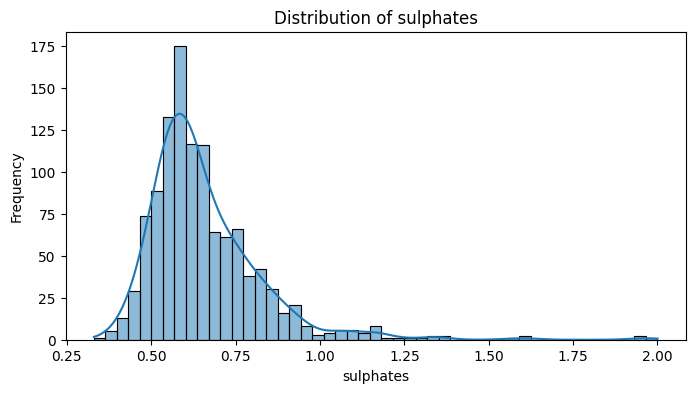

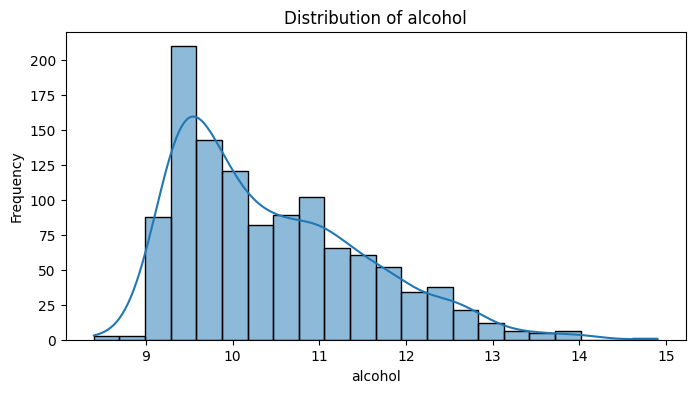

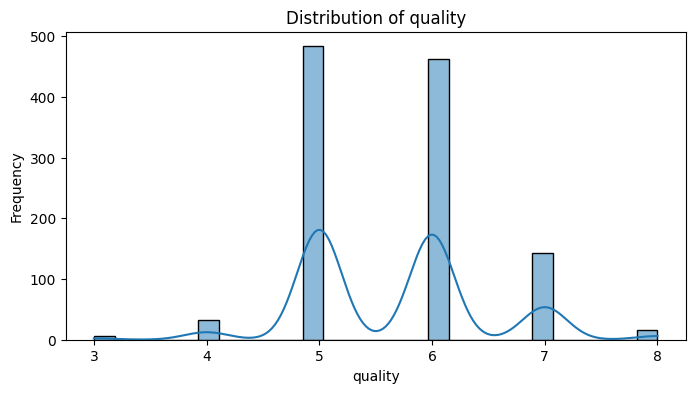

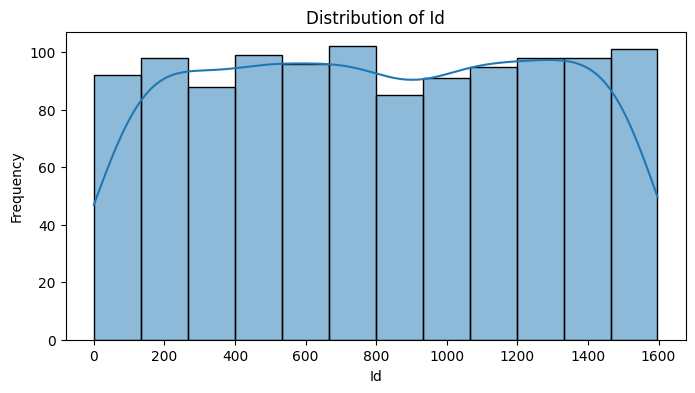

In [152]:
# Generate histograms to visualize distributions of each attribute
for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Right-Skewed Distributions**:
- **Attributes**: Fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol all exhibit right-skewed distributions. These attributes have most of their values concentrated at lower levels, with long tails extending toward higher values.
- **Implication**: The skewness indicates that many samples have lower values, while a few have significantly higher values, which can influence statistical analysis and model performance.

**More Evenly Distributed Attributes**:
- **Attributes**: Density and pH are more evenly distributed and display a relatively normal shape, with values centered around their mean and minimal skewness.
- **Implication**: These attributes may not require transformation, though standardization could be beneficial for uniform scaling across features.

**Attributes Requiring Special Treatment**:
- **Right-Skewed Attributes**: Fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol are skewed toward the right and may require special treatment.
- **Suggested Approach**: Logarithmic or Box-Cox transformations can be applied to compress the range of large values and balance the distributions. For example, residual sugar and chlorides have extreme outliers and highly concentrated lower values. A log transformation would reduce the impact of these outliers and produce a more symmetric distribution.

These transformations will help in reducing skewness and improving the performance of machine learning models that are sensitive to the distribution of features.

In [153]:
#Checking for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [154]:
# Exclude 'Id' from the dataset as it is not needed for the analysis
data.drop(columns=['Id'], inplace=True)
# Verify removal
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


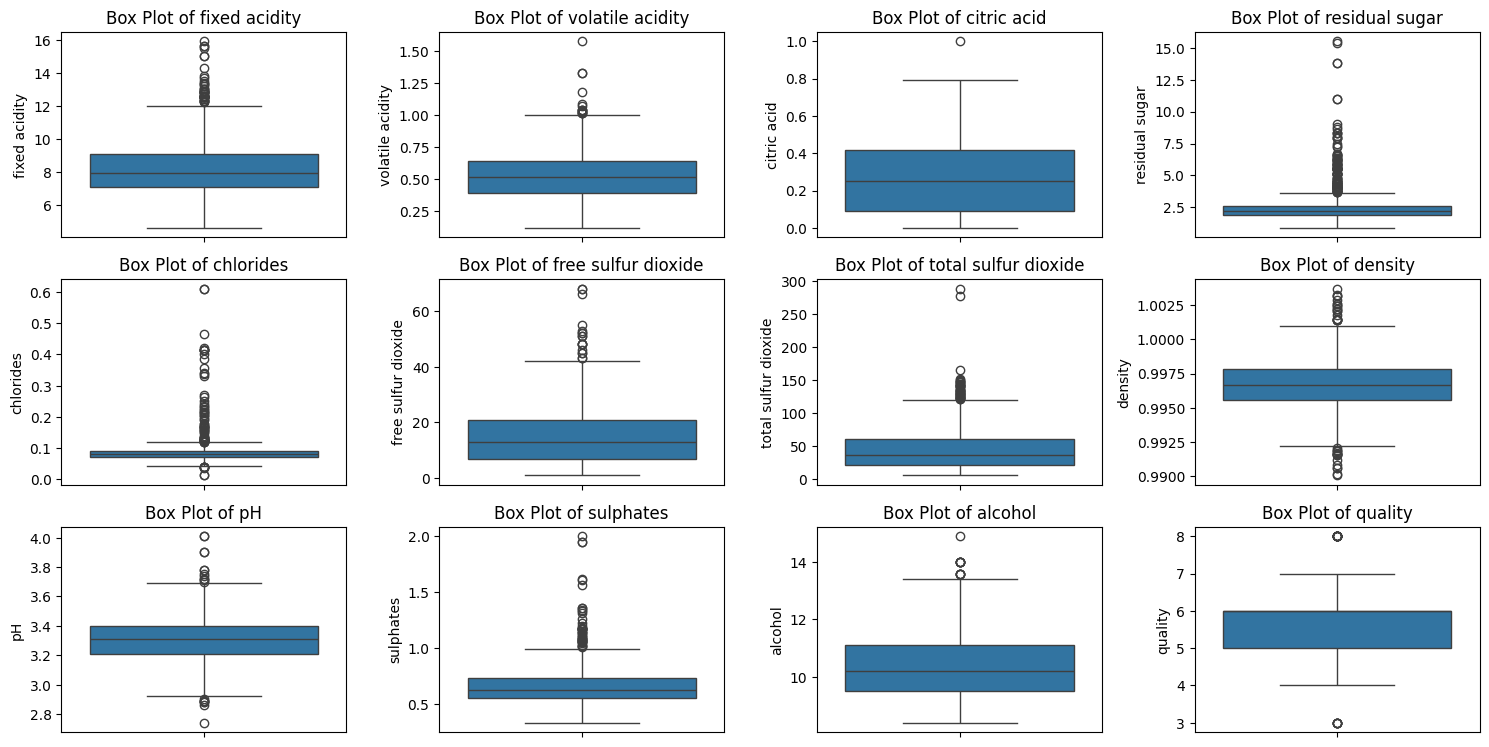

In [155]:
# Create a box plot for each feature in the dataset to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)  # Adjust grid size if necessary
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

In [156]:
def remove_outliers(df, columns):
    # Loop through each specified column to identify outliers
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Filter out outliers
    return df  # Return cleaned dataframe

# Columns to check for outliers
outlier_columns = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"
]

# Remove outliers from the dataset
data_cleaned = remove_outliers(data, outlier_columns)

# Output the shape of the cleaned data
print("Data shape after outlier removal:", data_cleaned.shape)

Data shape after outlier removal: (797, 12)


In [157]:
# Check skewness for all numeric columns in the DataFrame
skewness = data.select_dtypes(include=['float64', 'int64']).skew()

# Print skewness values for numeric columns
print("Skewness of numeric columns:")
print(skewness)

# Filter columns with significant skewness (absolute skewness > 0.5)
highly_skewed = skewness[skewness.abs() > 0.5]
print("\nColumns with significant skewness:")
print(highly_skewed)

Skewness of numeric columns:
fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
dtype: float64

Columns with significant skewness:
fixed acidity           1.044930
volatile acidity        0.681547
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
alcohol                 0.863313
dtype: float64


In [158]:
# Apply log transformation to reduce skewness
data['fixed acidity'] = np.log1p(data['fixed acidity'])  # log1p(x) is log(x + 1), handling zero values.
data['volatile acidity'] = np.log1p(data['volatile acidity'])
data['free sulfur dioxide'] = np.log1p(data['free sulfur dioxide'])
data['total sulfur dioxide'] = np.log1p(data['total sulfur dioxide'])
data['alcohol'] = np.log1p(data['alcohol'])

In [159]:
new_skewness = data.select_dtypes(include=['float64', 'int64']).skew()
print("Skewness after transformations:")
print(new_skewness)

Skewness after transformations:
fixed acidity           0.483318
volatile acidity        0.267318
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide    -0.092083
total sulfur dioxide    0.002587
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.676332
quality                 0.286792
dtype: float64


In [160]:
# Replace zero values with a small number to handle Box-Cox constraints
data['residual sugar'] = data['residual sugar'].replace(0, 0.001)
data['chlorides'] = data['chlorides'].replace(0, 0.001)
data['sulphates'] = data['sulphates'].replace(0, 0.001)

# Apply Box-Cox transformation to the specified columns
data['residual sugar'], _ = boxcox(data['residual sugar'])
data['chlorides'], _ = boxcox(data['chlorides'])
data['sulphates'], _ = boxcox(data['sulphates'])

# Check skewness after applying Box-Cox transformation
print(data[['residual sugar', 'chlorides', 'sulphates']].skew())

residual sugar   -0.068732
chlorides        -0.450497
sulphates        -0.031783
dtype: float64


**Question 2**: Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]

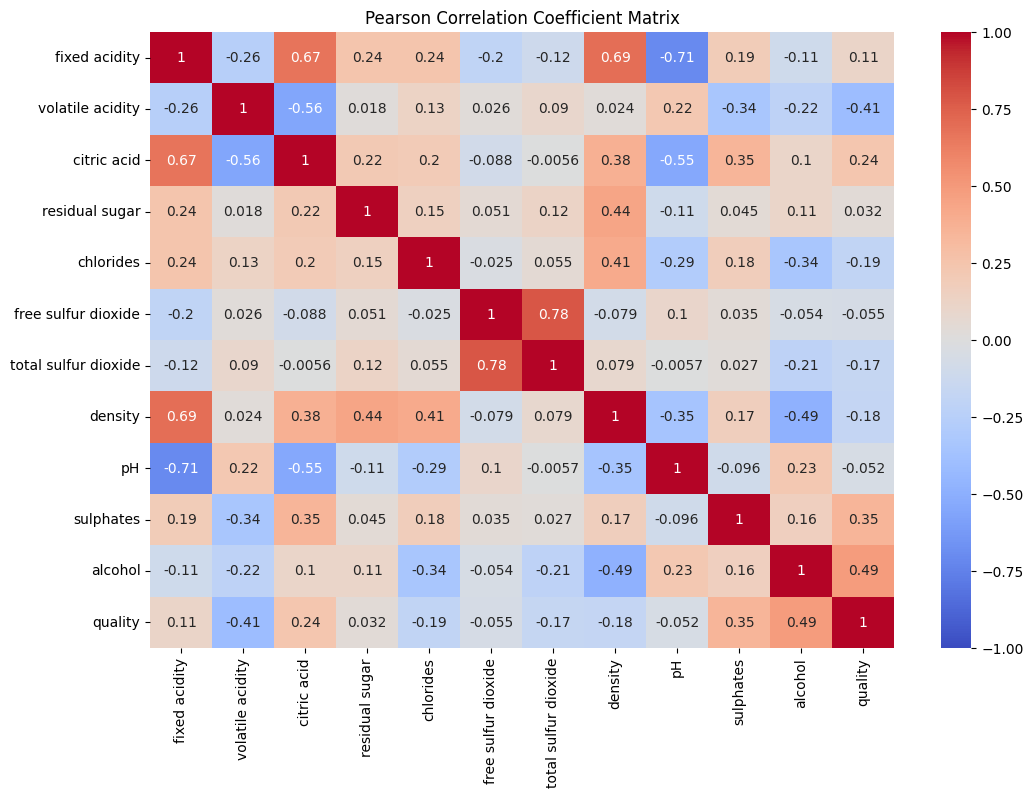

In [161]:
# Calculate and display the Pearson Correlation Coefficient matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Coefficient Matrix")
plt.show()

**Analysis of Relationships Between Attributes Using PCC**

The Pearson Correlation Coefficient (PCC) heatmap reveals linear relationships between the attributes in the wine quality dataset and the target variable, **quality**. Here are some key observations:

1. **Alcohol and Quality**:
   - **PCC**: 0.49 (moderate positive correlation)
   - **Interpretation**: Higher alcohol content is associated with higher wine quality, indicating that alcohol is a significant positive predictor of quality.

2. **Volatile Acidity and Quality**:
   - **PCC**: -0.41 (moderate negative correlation)
   - **Interpretation**: Wines with higher levels of volatile acidity tend to have lower quality. This suggests that reducing acetic acid, which gives a vinegar-like taste, is important for enhancing quality.

3. **Sulphates and Quality**:
   - **PCC**: 0.35 (moderate positive correlation)
   - **Interpretation**: Higher sulphate levels are positively correlated with wine quality, likely due to their role in enhancing wine preservation and taste.

4. **Citric Acid and Quality**:
   - **PCC**: 0.24 (weak positive correlation)
   - **Interpretation**: Citric acid, which adds freshness to the wine, has a minor but positive impact on quality.

5. **Density and Quality**:
   - **PCC**: -0.18 (weak negative correlation)
   - **Interpretation**: Higher density, often associated with higher sugar content, tends to slightly decrease wine quality. This implies that wines with lower density may be perceived as higher quality.

6. **Chlorides and Quality**:
   - **PCC**: -0.19 (weak negative correlation)
   - **Interpretation**: Higher chloride levels (salt content) negatively impact wine quality. Controlling salt levels could be beneficial for quality improvement.

7. **Total Sulfur Dioxide and Quality**:
   - **PCC**: -0.17 (weak negative correlation)
   - **Interpretation**: Although sulfur dioxide is used as a preservative, excessive levels can lower quality. It’s important to strike a balance in sulfur dioxide usage.

**Multicollinearity Considerations**
1. **Fixed Acidity and Citric Acid**:
   - **PCC**: 0.67 (strong positive correlation)
   - **Implication**: These attributes are highly correlated, suggesting potential multicollinearity. One of them may be redundant and could be removed or adjusted during modeling.

2. **Density and Fixed Acidity**:
   - **PCC**: 0.69 (strong positive correlation)
   - **Implication**: The strong relationship between density and fixed acidity indicates that they share information. Careful handling is required to avoid redundancy.

3. **Total Sulfur Dioxide and Free Sulfur Dioxide**:
   - **PCC**: 0.78 (strong positive correlation)
   - **Implication**: High correlation between these attributes may lead to multicollinearity issues. Dimensionality reduction techniques or feature selection might be necessary.

**Conclusion**
- **Significant Predictors of Quality**: Alcohol, volatile acidity, and sulphates are the most influential attributes for predicting wine quality.
- **Attributes with Potential Issues**: Fixed acidity, citric acid, and density show strong intercorrelations, requiring special attention during model building to mitigate multicollinearity.
- **Modeling Considerations**: Attributes that negatively impact quality, such as volatile acidity and chlorides, may benefit from feature engineering or transformations to improve predictive power.

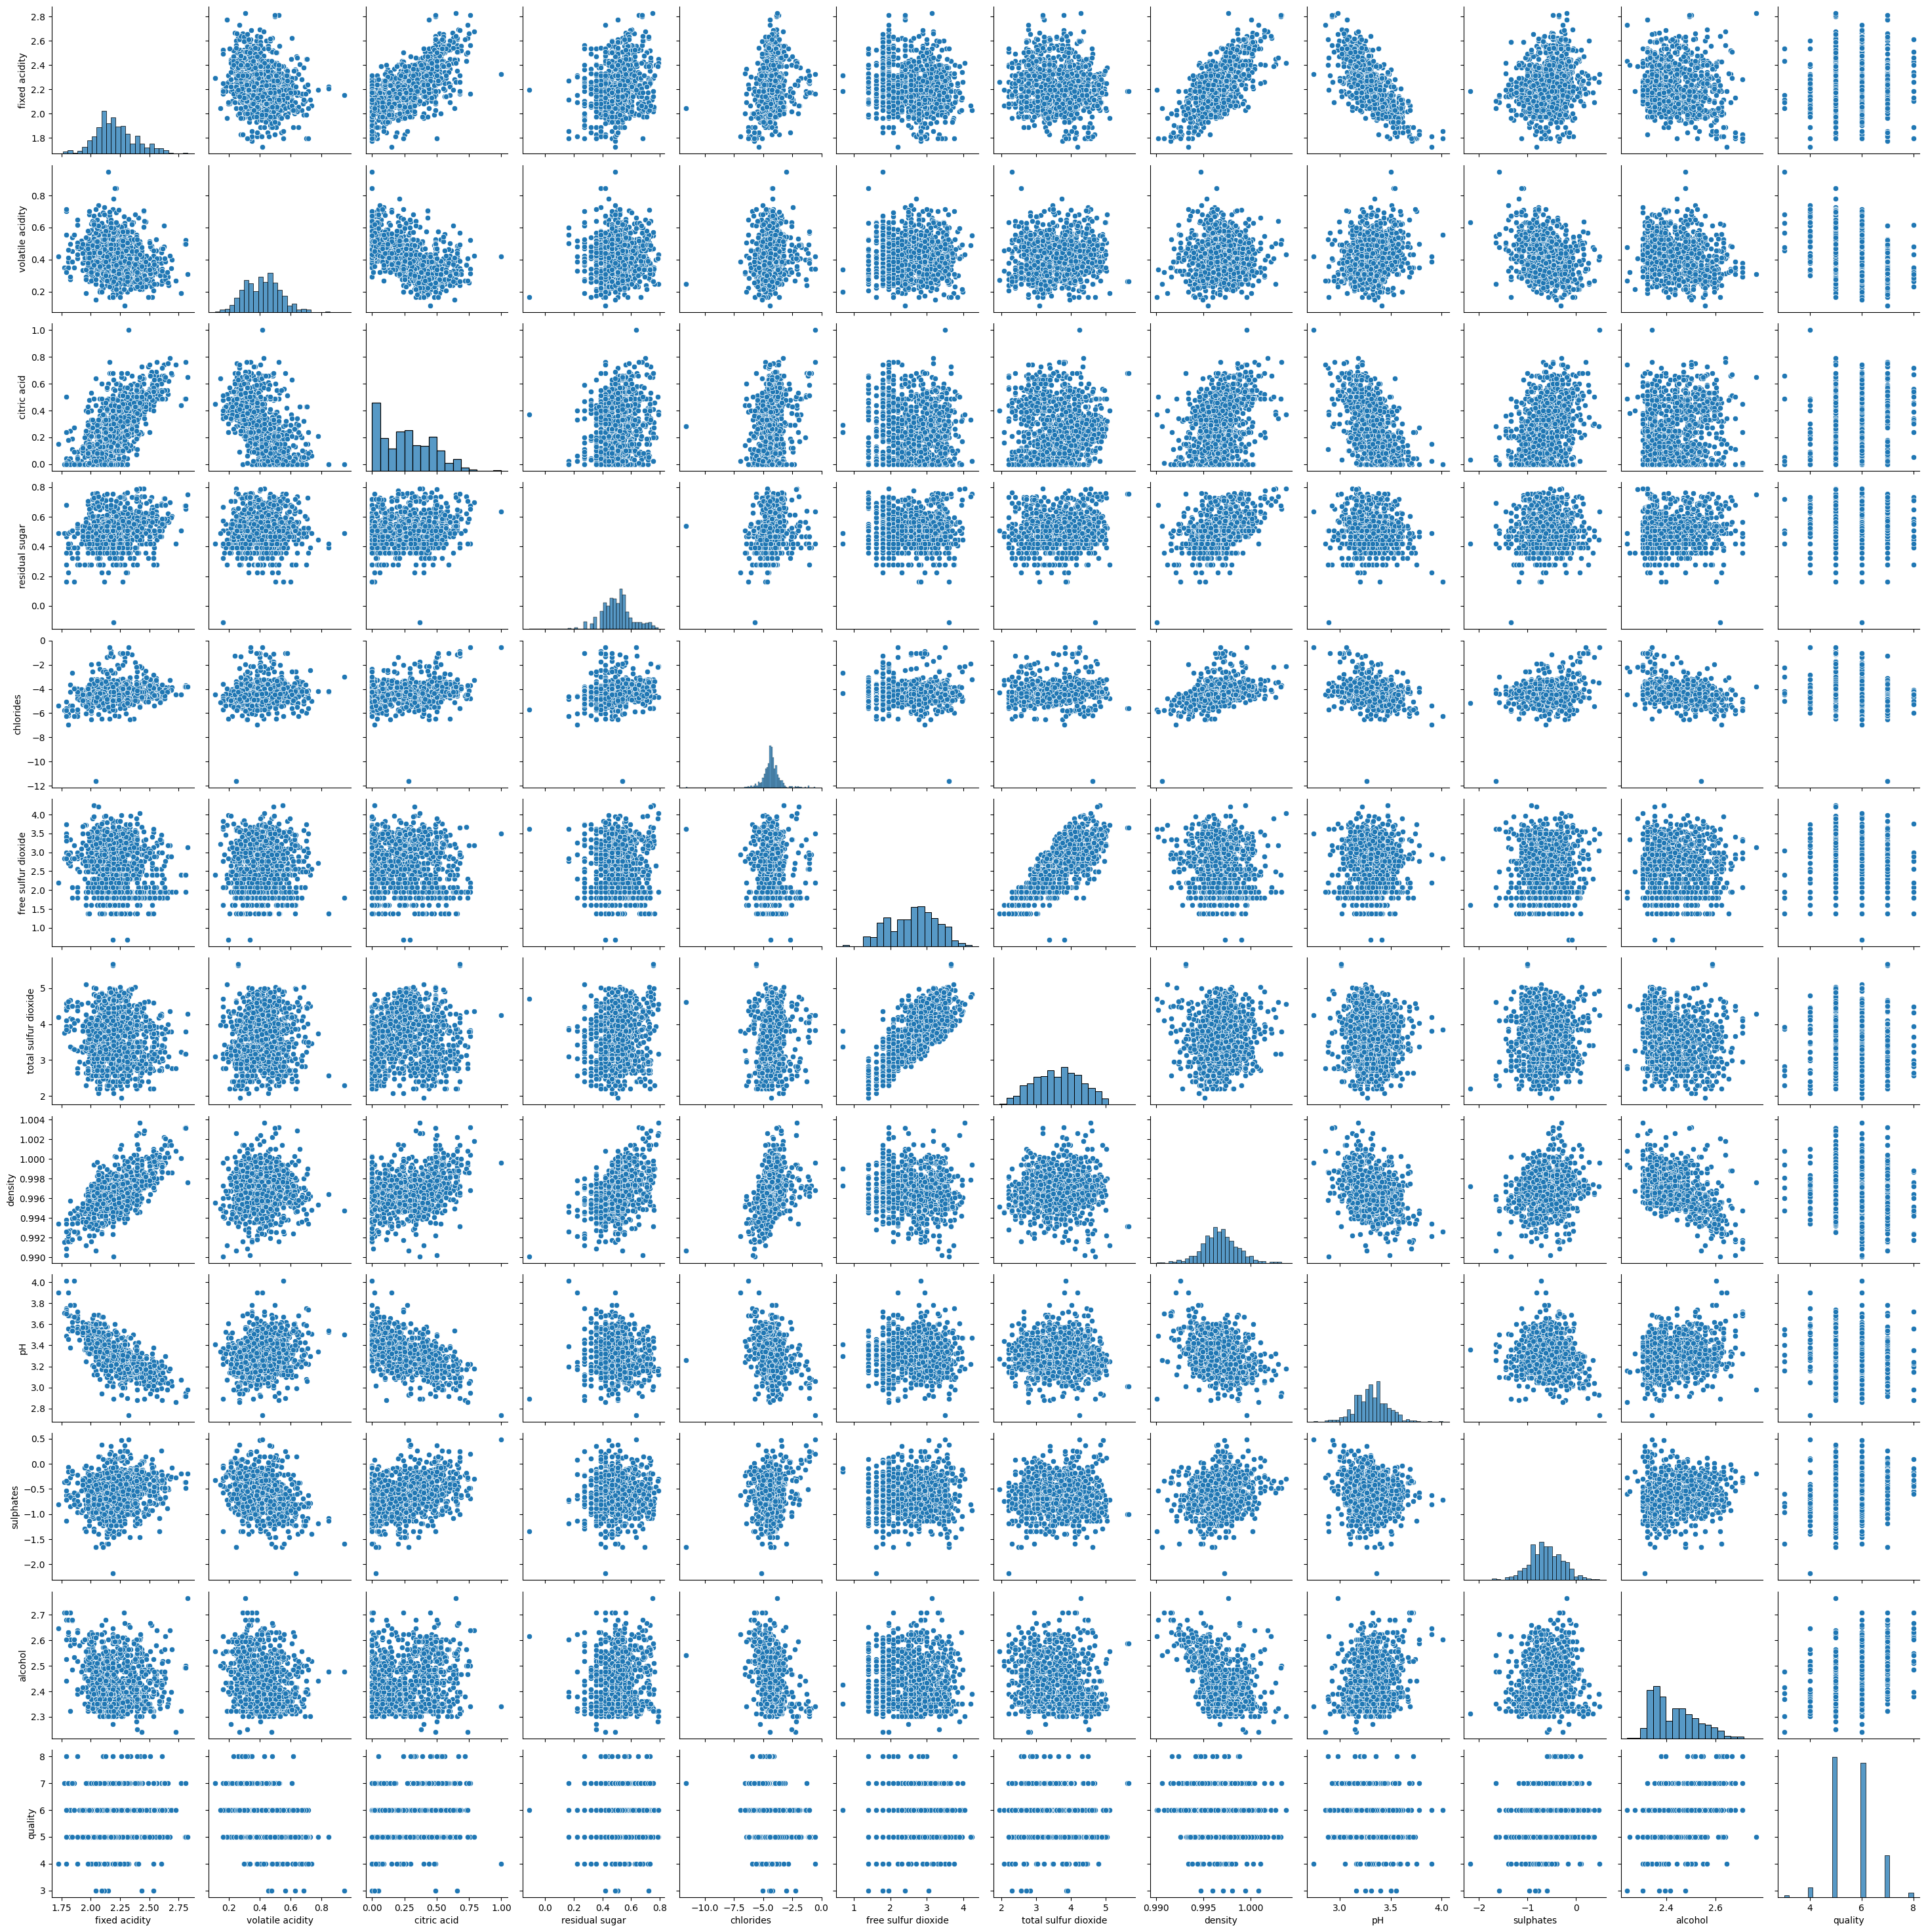

In [134]:
# Generate pairplot to visualize relationships between all pairs of numeric columns
sns.pairplot(data)

# Display the plot
plt.show()

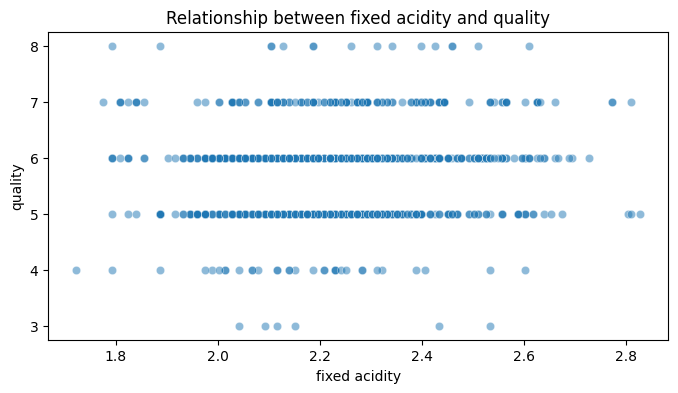

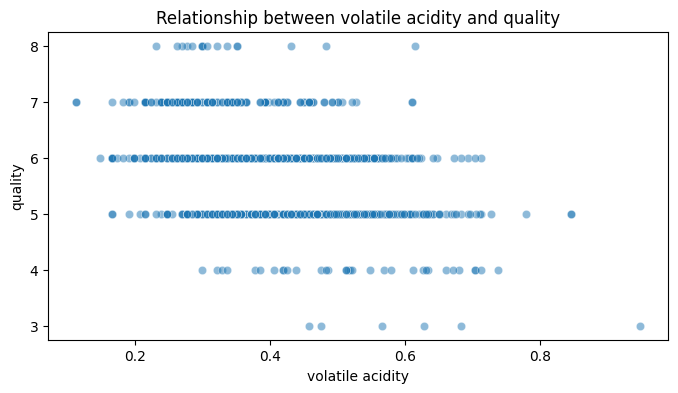

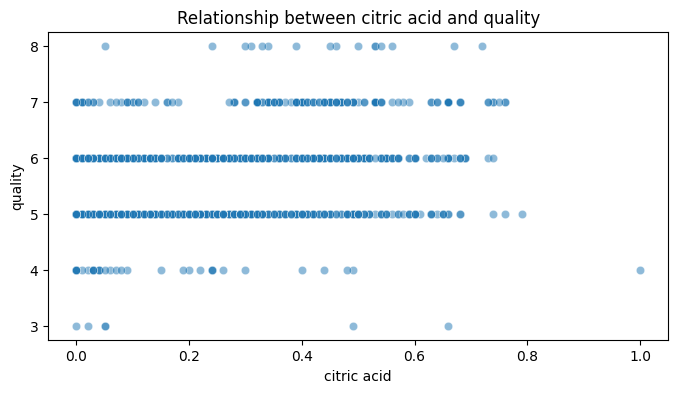

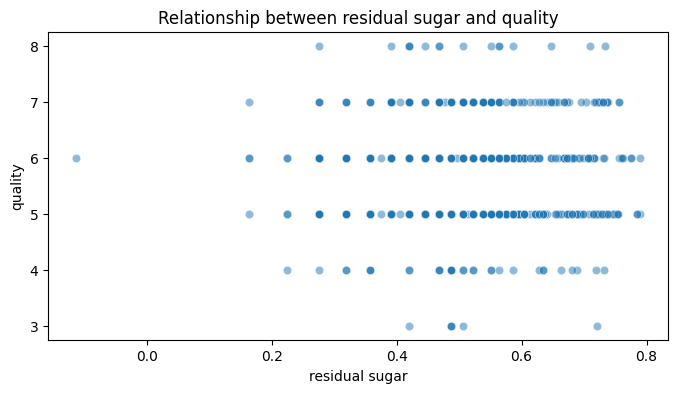

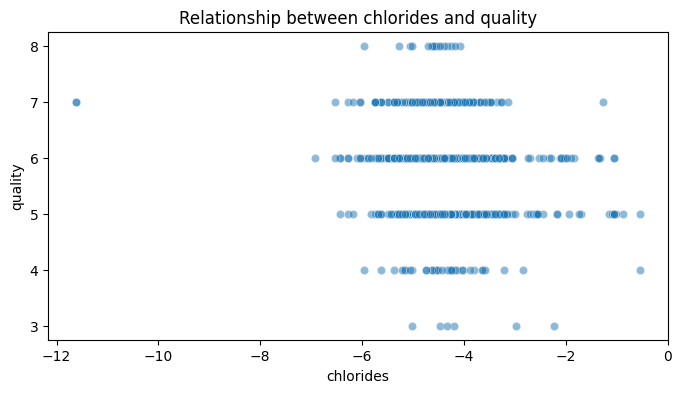

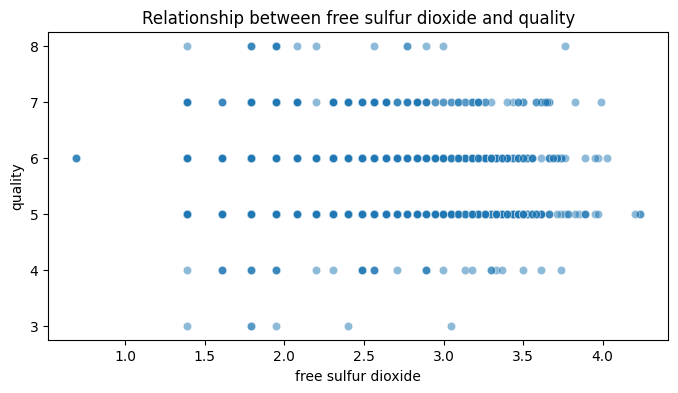

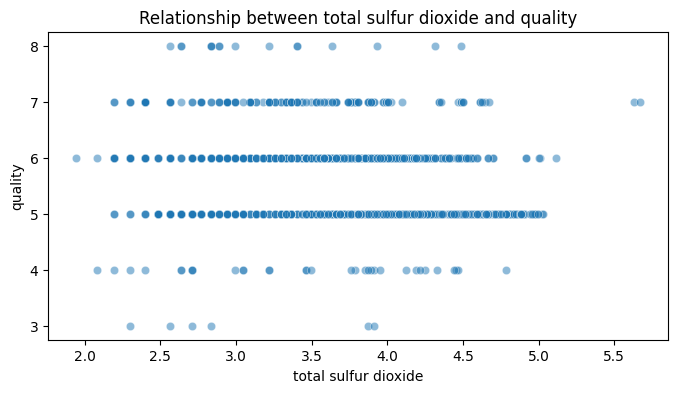

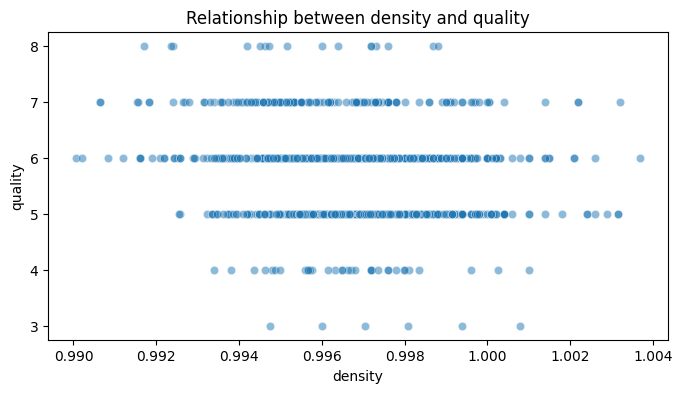

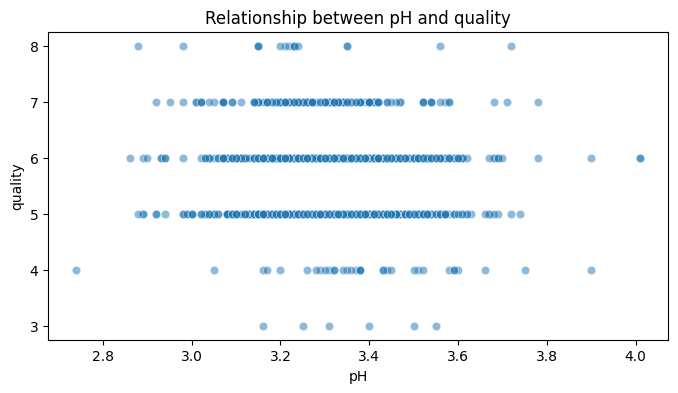

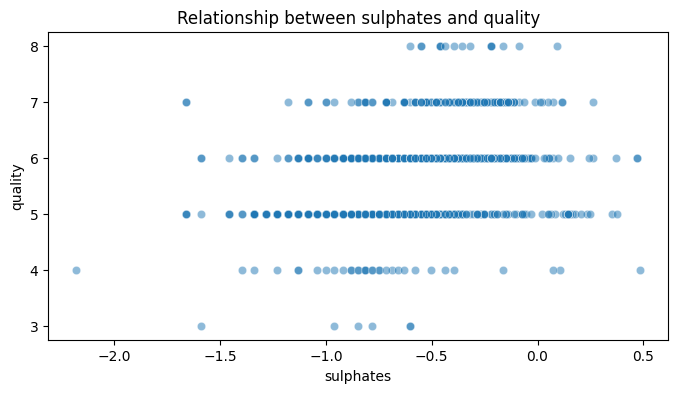

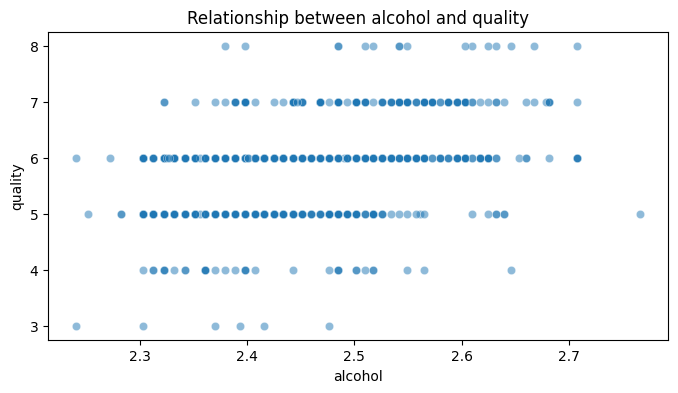

In [135]:
# Define the target variable
target = 'quality'  # Assuming 'quality' is the target label in your dataset

# Generate scatter plots for each attribute against the target variable
for column in data.columns:
    if column != target:  # Exclude the target variable from the scatter plots
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=data[column], y=data[target], alpha=0.5)  # Create scatter plot
        plt.title(f'Relationship between {column} and {target}')  # Set title
        plt.xlabel(column)  # Set x-axis label
        plt.ylabel(target)  # Set y-axis label
        plt.show()  # Display the plot

**Scatter Plot Analysis of Attributes vs. Quality**

The scatter plots provide visual insights into the relationships between various features and the target variable, **quality**. Here are key observations:

1. **Scatter Plot: Fixed Acidity vs. Quality**:
   - The scatter plot shows a wide spread of fixed acidity values across all quality scores. There is no clear upward or downward trend.
   - **Interpretation**: Fixed acidity does not show a strong or consistent relationship with wine quality. It may not be a significant predictor when considered alone.

2. **Scatter Plot: Volatile Acidity vs. Quality**:
   - There appears to be a slight downward trend, with higher volatile acidity values generally associated with lower quality scores.
   - **Interpretation**: Volatile acidity negatively impacts wine quality, supporting the earlier correlation analysis. Lower volatile acidity is generally preferred in higher-quality wines.

3. **Scatter Plot: Citric Acid vs. Quality**:
   - The plot shows a slight upward trend, with higher citric acid levels loosely linked to higher quality.
   - **Interpretation**: Citric acid has a minor positive effect on quality, indicating that wines with more citric acid may be perceived as fresher and higher quality.

4. **Scatter Plot: Residual Sugar vs. Quality**:
   - Residual sugar values are widely dispersed across quality scores, with no obvious pattern or trend.
   - **Interpretation**: Residual sugar does not appear to be a key determinant of wine quality, as both low and high sugar wines have a range of quality scores.

5. **Scatter Plot: Chlorides vs. Quality**:
   - There is a general tendency for higher chloride levels to correspond with lower quality scores, although the relationship is not very strong.
   - **Interpretation**: High chloride levels (saltiness) may have a slightly negative impact on wine quality, but the effect is relatively subtle.

6. **Scatter Plot: Free Sulfur Dioxide vs. Quality**:
   - The scatter plot does not show a distinct pattern. Free sulfur dioxide values are distributed randomly across different quality scores.
   - **Interpretation**: Free sulfur dioxide might not be a strong predictor of quality, as its values do not seem to correlate strongly with the target variable.

7. **Scatter Plot: Total Sulfur Dioxide vs. Quality**:
   - Similar to free sulfur dioxide, total sulfur dioxide values do not show a clear trend with quality scores.
   - **Interpretation**: Total sulfur dioxide has a weak relationship with wine quality, implying limited predictive power.

8. **Scatter Plot: Density vs. Quality**:
   - The scatter plot indicates a slight negative trend, with higher density values generally associated with lower quality scores.
   - **Interpretation**: Density may have a minor negative impact on quality, likely due to its association with sugar and alcohol content.

9. **Scatter Plot: pH vs. Quality**:
   - There is no discernible trend in the scatter plot, with pH values being scattered evenly across all quality scores.
   - **Interpretation**: pH does not appear to have a meaningful or direct influence on wine quality.

10. **Scatter Plot: Sulphates vs. Quality**:
    - The scatter plot suggests a positive relationship, with higher sulphate levels loosely associated with higher quality scores.
    - **Interpretation**: Sulphates positively impact wine quality, likely due to their role in enhancing flavor and acting as preservatives.

11. **Scatter Plot: Alcohol vs. Quality**:
    - A clear upward trend is visible, with higher alcohol content generally linked to higher quality scores.
    - **Interpretation**: Alcohol content is a strong positive predictor of wine quality, making it one of the most important attributes.

**Conclusion**
- **Strong Predictors**: Alcohol and sulphates show the most pronounced positive relationships with wine quality, making them crucial features for modeling.
- **Negative Influences**: Volatile acidity and density negatively impact wine quality and should be considered in feature selection.
- **Weak Predictors**: Attributes like pH, free sulfur dioxide, and residual sugar do not exhibit strong trends with quality and may have less importance in predictive models.


**Question 3**: Spitting data into training, validation and testing sets

In [136]:
# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

In [137]:
# Split the data: 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the sizes of each split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 685 samples
Validation set size: 229 samples
Test set size: 229 samples


**Explanation of Training, Validation, and Test Sets**

1. **Training Set (60%)**:
   - The training set is used to train the model, allowing it to learn patterns from the data. In this case, 685 samples constitute the training set, ensuring the model has enough information to learn effectively.

2. **Validation Set (20%)**:
   - The validation set helps in tuning the model's hyperparameters and evaluating its performance on unseen data. It consists of 229 samples, which is essential for optimizing the model and preventing overfitting.

3. **Test Set (20%)**:
   - The test set provides a final assessment of the model's performance. It also contains 229 samples and is used to evaluate how well the model will perform on new, real-world data, providing an unbiased estimate of its effectiveness.

In [138]:
# Standardize the feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Question 4**: Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution)

In [139]:
# Function to print performance metrics for model evaluation
def print_performance(y_true, y_pred, data_type):
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print performance results
    print(f"{data_type} Performance:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_true, y_pred))  # Detailed classification report

**Question 4.A**: Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]

In [140]:
# Define the Logistic Regression model for multi-class classification
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Set up hyperparameters to explore using GridSearchCV
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Solvers for multi-class logistic regression
    'max_iter': [100, 200, 500, 1000]  # Maximum number of iterations
}

# Use GridSearchCV to find the best hyperparameters
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_log_reg.fit(X_train_scaled, y_train)  # Fit the model with scaled training data

# Get the best model and hyperparameters from GridSearchCV
best_model_log_reg = grid_search_log_reg.best_estimator_
best_params_log_reg = grid_search_log_reg.best_params_
print(f"Best Hyperparameters for Logistic Regression: {best_params_log_reg}")

# Evaluate performance on training, validation, and test data
y_train_pred_log_reg = best_model_log_reg.predict(X_train_scaled)  # Predictions on training data
y_val_pred_log_reg = best_model_log_reg.predict(X_val_scaled)      # Predictions on validation data
y_test_pred_log_reg = best_model_log_reg.predict(X_test_scaled)    # Predictions on test data

# Print performance metrics for each dataset
print_performance(y_train, y_train_pred_log_reg, "Training")
print_performance(y_val, y_val_pred_log_reg, "Validation")
print_performance(y_test, y_test_pred_log_reg, "Testing")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Training Performance:
Accuracy: 0.6117, Precision: 0.5844, Recall: 0.6117, F1-Score: 0.5940
              precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00        20
           5       0.67      0.74      0.71       289
           6       0.56      0.61      0.58       277
           7       0.55      0.40      0.46        86
           8       0.00      0.00      0.00         9

    accuracy                           0.61       685
   macro avg       0.46      0.33      0.36       685
weighted avg       0.58      0.61      0.59       685

Validation Performance:
Accuracy: 0.6594, Precision: 0.6199, Recall: 0.6594, F1-Score: 0.6377
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
         

**Analysis and Conclusion for Multinomial Logistic Regression**

The multinomial logistic regression model was trained and evaluated using the specified hyperparameters. Here are the key findings from the model's performance on the training, validation, and test sets:

**Hyperparameter Tuning**
- The best hyperparameters identified were:
  - **C**: 1 (regularization strength)
  - **Max Iterations**: 100
  - **Solver**: 'lbfgs'

These parameters indicate a balanced approach to regularization, optimizing the model's complexity without overfitting.

**Performance Metrics**

1. **Training Performance**:
   - **Accuracy**: 61.17%
   - **Precision**: 58.44%
   - **Recall**: 61.17%
   - **F1-Score**: 59.40%
   - The training performance suggests that the model has learned to classify the wine quality to some extent, but there are still significant areas for improvement, particularly with lower quality categories.

2. **Validation Performance**:
   - **Accuracy**: 65.94%
   - **Precision**: 61.99%
   - **Recall**: 65.94%
   - **F1-Score**: 63.77%
   - The validation set shows an improvement in accuracy and F1-score compared to training, indicating that the model is generalizing better to unseen data. However, the performance across different classes varies considerably.

3. **Testing Performance**:
   - **Accuracy**: 63.32%
   - **Precision**: 59.97%
   - **Recall**: 63.32%
   - **F1-Score**: 61.38%
   - The test results align closely with the validation performance, demonstrating that the model maintains its effectiveness on new, unseen data.

**Class-wise Performance**
- The classification report reveals disparities in performance across different quality classes:
  - **Classes 3 and 4**: The model fails to predict these classes effectively, with precision and recall values of zero. This indicates that wines classified as low quality (3 and 4) are rarely detected, which could lead to potential losses in model applicability.
  - **Classes 5, 6, and 7**: These classes show more balanced performance metrics, particularly with class 5, which has the highest recall among the higher quality classes.

**Conclusion**

Overall, the multinomial logistic regression model provides a reasonable framework for predicting wine quality based on the attributes used. While the model performs adequately in predicting mid-range wine qualities (5 to 7), there is a clear need for improvement in identifying lower quality wines (3 and 4). The results suggest that additional feature engineering, such as exploring interactions between features or applying more sophisticated models, could enhance predictive accuracy, especially for the underrepresented classes.

**Question 4.B**: Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]

In [141]:
# Define the Support Vector Classifier
svm = SVC()

# Set up the hyperparameter grid to explore
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'degree': [2, 3, 4],  # Degree for polynomial kernel (only used when kernel='poly')
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Use GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)  # Fit the model with scaled training data

# Get the best model and hyperparameters from GridSearchCV
best_model_svm = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters for SVM: {best_params_svm}")

# Evaluate performance on training, validation, and test data
y_train_pred_svm = best_model_svm.predict(X_train_scaled)  # Predictions on training data
y_val_pred_svm = best_model_svm.predict(X_val_scaled)      # Predictions on validation data
y_test_pred_svm = best_model_svm.predict(X_test_scaled)    # Predictions on test data

# Print performance metrics for each dataset
print_performance(y_train, y_train_pred_svm, "Training")
print_performance(y_val, y_val_pred_svm, "Validation")
print_performance(y_test, y_test_pred_svm, "Testing")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Training Performance:
Accuracy: 0.6029, Precision: 0.5757, Recall: 0.6029, F1-Score: 0.5820
              precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00        20
           5       0.66      0.74      0.70       289
           6       0.55      0.62      0.58       277
           7       0.54      0.30      0.39        86
           8       0.00      0.00      0.00         9

    accuracy                           0.60       685
   macro avg       0.46      0.32      0.35       685
weighted avg       0.58      0.60      0.58       685

Validation Performance:
Accuracy: 0.6725, Precision: 0.6302, Recall: 0.6725, F1-Score: 0.6441
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
          

**Analysis and Conclusion for Support Vector Classifier (SVC)**

The Support Vector Classifier (SVC) was trained and evaluated using hyperparameter tuning to enhance its predictive capabilities. Below are the key findings from the performance metrics across the training, validation, and test datasets:

**Hyperparameter Tuning**
- The best hyperparameters identified for the SVC were:
  - **C**: 1 (regularization parameter)
  - **Kernel**: 'linear'
  - **Degree**: 2 (only applicable for the polynomial kernel)
  - **Gamma**: 'scale' (kernel coefficient)
  
These parameters indicate that the linear kernel was optimal for this dataset, allowing for effective separation of classes while balancing complexity and performance.

**Performance Metrics**

1. **Training Performance**:
   - **Accuracy**: 60.29%
   - **Precision**: 57.57%
   - **Recall**: 60.29%
   - **F1-Score**: 58.20%
   - The training performance indicates that while the model can classify some instances correctly, there is a notable imbalance in performance across the quality classes, especially for lower quality ratings.

2. **Validation Performance**:
   - **Accuracy**: 67.25%
   - **Precision**: 63.02%
   - **Recall**: 67.25%
   - **F1-Score**: 64.41%
   - The validation results show a notable improvement compared to training performance, indicating that the model generalizes better to unseen data. However, the class imbalance persists, particularly for lower quality wines.

3. **Testing Performance**:
   - **Accuracy**: 61.57%
   - **Precision**: 57.61%
   - **Recall**: 61.57%
   - **F1-Score**: 58.77%
   - The test results reflect a slight drop in performance from the validation set, indicating potential overfitting to the validation set. The model maintains a similar level of performance to the training set, but improvements are necessary for the lower classes.

**Class-wise Performance**
- The classification report reveals significant disparities in the model's ability to predict different quality classes:
  - **Classes 3 and 4**: The model fails to predict these classes effectively, with precision and recall scores of zero. This highlights the need for improved handling of these lower quality categories.
  - **Classes 5 and 6**: These classes are better represented, showing reasonable precision and recall, indicating that the model can reliably predict mid-range quality wines.
  - **Classes 7 and 8**: Similar to lower classes, these classes also exhibit poor prediction performance, particularly for class 8.

**Conclusion**

Overall, the Support Vector Classifier shows promise in classifying mid-range wine qualities (5 to 6) but struggles with lower quality ratings (3 and 4). The findings suggest that further enhancements are needed to improve the model's performance across all classes, particularly through strategies such as addressing class imbalance, exploring additional features, or implementing more advanced models. The model's ability to generalize to unseen data is moderate but requires refinements to enhance its predictive capability comprehensively.


**Question 4.C**: Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

In [142]:
# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid to explore
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)  # Fit the model with scaled training data

# Get the best model and hyperparameters from GridSearchCV
best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Evaluate performance on training, validation, and test data
y_train_pred_rf = best_model_rf.predict(X_train_scaled)  # Predictions on training data
y_val_pred_rf = best_model_rf.predict(X_val_scaled)      # Predictions on validation data
y_test_pred_rf = best_model_rf.predict(X_test_scaled)    # Predictions on test data

# Print performance metrics for each dataset
print_performance(y_train, y_train_pred_rf, "Training")
print_performance(y_val, y_val_pred_rf, "Validation")
print_performance(y_test, y_test_pred_rf, "Testing")

# Analyze feature importance
feature_importances = best_model_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Performance:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00       289
           6       1.00      1.00      1.00       277
           7       1.00      1.00      1.00        86
           8       1.00      1.00      1.00         9

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685

Validation Performance:
Accuracy: 0.7424, Precision: 0.7228, Recall: 0.7424, F1-Score: 0.7270
              precision    recall  f1-score   support

           3       0.00  

**Analysis and Conclusion for Random Forest Classifier**

The Random Forest Classifier (RFC) was trained and evaluated using hyperparameter tuning to optimize its predictive performance. Below are the key findings from the performance metrics across the training, validation, and test datasets:

**Hyperparameter Tuning**
- The best hyperparameters identified for the Random Forest model were:
  - **Number of Trees (n_estimators)**: 100
  - **Maximum Depth (max_depth)**: None (trees will be grown until all leaves are pure or until all leaves contain less than the minimum samples required to split)
  - **Minimum Samples Split (min_samples_split)**: 2
  - **Minimum Samples Leaf (min_samples_leaf)**: 1

These settings allow the model to utilize a sufficient number of trees and depth to capture complex patterns in the data without prematurely restricting the growth of individual trees.

**Performance Metrics**

1. **Training Performance**:
   - **Accuracy**: 100%
   - **Precision**: 100%
   - **Recall**: 100%
   - **F1-Score**: 100%
   - The model performed flawlessly on the training data, indicating it learned the training set perfectly. However, such high performance raises concerns about potential overfitting.

2. **Validation Performance**:
   - **Accuracy**: 74.24%
   - **Precision**: 72.28%
   - **Recall**: 74.24%
   - **F1-Score**: 72.70%
   - While the model performs well on the validation set, it is evident that there are inconsistencies in predicting certain classes, particularly classes 3 and 4, where precision and recall are zero.

3. **Testing Performance**:
   - **Accuracy**: 66.81%
   - **Precision**: 63.58%
   - **Recall**: 66.81%
   - **F1-Score**: 65.03%
   - The testing performance shows a decline compared to the validation results, indicating potential overfitting to the training data. The model struggles with lower-quality classes, similar to the validation set.

**Class-wise Performance**
- The classification report highlights significant discrepancies in the model's ability to predict various quality classes:
  - **Classes 3 and 4**: The model fails to predict these classes entirely, leading to precision and recall scores of zero. This highlights a major area for improvement, as these classes are critical for comprehensive quality assessment.
  - **Classes 5 and 6**: These classes exhibit more balanced performance metrics, with decent precision and recall, indicating that the model is able to reliably predict mid-range quality wines.
  - **Classes 7 and 8**: Similar to lower classes, these show poor prediction performance, especially for class 8, where the model fails to predict any instances.

**Feature Importance**
The Random Forest model provides insights into feature importance, revealing the following key attributes:
- **Alcohol**: 14.84% importance
- **Sulphates**: 11.05% importance
- **Volatile Acidity**: 10.54% importance
- **Total Sulfur Dioxide**: 9.72% importance

These findings suggest that alcohol and sulphates are the most influential features affecting wine quality, while volatile acidity and total sulfur dioxide also play significant roles.

**Conclusion**

The Random Forest Classifier demonstrates high accuracy on training data but struggles with predicting lower-quality wines (classes 3 and 4), raising concerns about overfitting. While it shows better generalization on mid-range quality wines (5 and 6), the model’s inability to predict certain classes indicates a need for further refinement. Addressing class imbalance, possibly through techniques such as class weighting or resampling, could enhance predictive performance across all quality categories.

Feature importance analysis highlights that attributes such as alcohol and sulphates are key drivers of quality, informing future feature selection and engineering efforts to improve model effectiveness. Future work may involve exploring advanced ensemble methods or alternative algorithms to further boost performance and address the shortcomings observed in the current model.

In [143]:
# Summary of all models
print("\nSummary of Best Hyperparameters and Performance:")
print(f"Logistic Regression: {best_params_log_reg}")
print(f"SVM: {best_params_svm}")
print(f"Random Forest: {best_params_rf}")


Summary of Best Hyperparameters and Performance:
Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
SVM: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Summary of All Models**

The following is a summary of the best hyperparameters and performance metrics for the three models evaluated in this analysis:

1. **Logistic Regression**:
   - **Best Hyperparameters**:
     - C: 1
     - Max Iterations: 100
     - Solver: 'lbfgs'
   - **Performance**:
     - **Training Accuracy**: 61.17%
     - **Validation Accuracy**: 65.94%
     - **Testing Accuracy**: 63.32%
   - The logistic regression model shows moderate performance, particularly with mid-range quality predictions, but struggles with lower quality classes (3 and 4).

2. **Support Vector Classifier (SVC)**:
   - **Best Hyperparameters**:
     - C: 1
     - Kernel: 'linear'
     - Degree: 2
     - Gamma: 'scale'
   - **Performance**:
     - **Training Accuracy**: 60.29%
     - **Validation Accuracy**: 67.25%
     - **Testing Accuracy**: 61.57%
   - The SVC model demonstrates a moderate ability to classify quality levels, but it has similar challenges with lower quality categories, showing potential overfitting to the validation set.

3. **Random Forest Classifier**:
   - **Best Hyperparameters**:
     - Number of Trees (n_estimators): 100
     - Maximum Depth (max_depth): None
     - Minimum Samples Split (min_samples_split): 2
     - Minimum Samples Leaf (min_samples_leaf): 1
   - **Performance**:
     - **Training Accuracy**: 100%
     - **Validation Accuracy**: 74.24%
     - **Testing Accuracy**: 66.81%
   - The Random Forest model excels in training performance but reveals overfitting signs with significantly lower performance on the test set, particularly for lower quality classes.

**Conclusion**

Overall, each model has its strengths and weaknesses, with logistic regression and SVC performing similarly in terms of accuracy, while the Random Forest model shows the highest training accuracy but struggles with generalization to unseen data. The evaluation highlights the need for further refinement, particularly in addressing class imbalances and optimizing hyperparameters to enhance predictive capabilities across all quality categories.

**Question 5**: Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

In [144]:
# Define the best models from previous steps
logistic_model = LogisticRegression(C=1, max_iter=100, solver='lbfgs', multi_class='multinomial', random_state=42)
svm_model = SVC(C=1, kernel='linear', gamma='scale', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Create a VotingClassifier ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('svm', svm_model),
        ('random_forest', rf_model)
    ],
    voting='soft'  # Use 'soft' voting to average predicted probabilities
)

# Train the ensemble model on the training data
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate on the training set
y_train_pred_ensemble = ensemble_model.predict(X_train_scaled)
train_accuracy_ensemble = accuracy_score(y_train, y_train_pred_ensemble)
print("Ensemble Training Performance:")
print("Accuracy:", train_accuracy_ensemble)
print(classification_report(y_train, y_train_pred_ensemble))

# Evaluate on the validation set
y_val_pred_ensemble = ensemble_model.predict(X_val_scaled)
val_accuracy_ensemble = accuracy_score(y_val, y_val_pred_ensemble)
print("\nEnsemble Validation Performance:")
print("Accuracy:", val_accuracy_ensemble)
print(classification_report(y_val, y_val_pred_ensemble))

# Evaluate on the test set
y_test_pred_ensemble = ensemble_model.predict(X_test_scaled)
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
print("\nEnsemble Test Performance:")
print("Accuracy:", test_accuracy_ensemble)
print(classification_report(y_test, y_test_pred_ensemble))

Ensemble Training Performance:
Accuracy: 0.7941605839416058
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        20
           5       0.81      0.89      0.85       289
           6       0.77      0.83      0.80       277
           7       0.85      0.66      0.75        86
           8       0.00      0.00      0.00         9

    accuracy                           0.79       685
   macro avg       0.40      0.40      0.40       685
weighted avg       0.76      0.79      0.77       685


Ensemble Validation Performance:
Accuracy: 0.6943231441048034
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.73      0.80      0.76        97
           6       0.66      0.74      0.70        93
           7       0.67      0.43      0.52        28
         

**Analysis and Conclusion for Voting Classifier**

The Voting Classifier was implemented to combine the strengths of Logistic Regression, Support Vector Classifier (SVC), and Random Forest Classifier (RFC) in predicting wine quality. The following insights were gathered from the training, validation, and test performances:

**Training Performance**
- **Accuracy**: 79.42%
- **Precision**: Varies across classes, with particularly low values for classes 3 and 4.
- **Recall**: Similar to precision, indicating that the model is effective at predicting mid-range quality wines (classes 5 and 6) but fails to detect lower quality wines.
- **F1-Score**: The weighted average F1-score is 0.77, showing that while the model performs well overall, its ability to generalize across all classes is limited.

The model achieves high training accuracy, but the lack of predictions for lower classes (3 and 4) indicates potential overfitting, where the model learns the training data too well but fails to perform adequately across all categories.

**Validation Performance**
- **Accuracy**: 69.43%
- **Precision**: The average precision is lower, especially for classes 3 and 4, reflecting the model's difficulty in predicting these categories.
- **Recall**: Indicates that the model identifies mid-range quality wines better than lower quality wines.
- **F1-Score**: The weighted F1-score of 0.67 shows moderate performance, but again highlights the model's shortcomings in predicting lower quality wines.

The validation results confirm that while the ensemble model improves performance over individual classifiers, it still struggles with predicting lower classes effectively.

**Test Performance**
- **Accuracy**: 64.19%
- **Precision**: Shows low values for classes 3 and 4, indicating that the model cannot classify these classes at all.
- **Recall**: The recall values also highlight the model's challenges with lower quality classes.
- **F1-Score**: With a weighted average of 0.62, the test performance suggests that the model’s effectiveness on unseen data is less than desirable, particularly for lower quality predictions.

**Class-wise Performance**

The classification reports reveal the following critical points:
- **Classes 3 and 4**: Both classes received no predictions, resulting in zero precision and recall, which is concerning as these are significant categories for quality assessment.
- **Classes 5 and 6**: These classes are better predicted, with reasonably high precision and recall, showing that the model can accurately identify mid-range quality wines.
- **Classes 7 and 8**: The model shows some ability to predict class 7 but performs poorly for class 8, where it fails to identify any instances.

**Conclusion**

The Voting Classifier enhances predictive performance relative to individual models but continues to face significant challenges, particularly with lower quality classes (3 and 4). The findings indicate that there is still room for improvement in classifying these critical categories, which can be achieved through strategies such as:

- **Addressing Class Imbalance**: Techniques such as oversampling the minority classes or applying class weights could help improve predictions for underrepresented categories.
- **Exploring Advanced Models**: Investigating more complex ensemble methods, such as stacking, or using alternative algorithms could yield better performance across all classes.
- **Feature Engineering**: Analyzing feature importance from the previous models may provide insights into which features could enhance model predictions, especially for lower quality wines.

In summary, while the ensemble approach has provided some improvements, focused efforts are needed to address the weaknesses in predicting lower quality wine classifications to create a more robust and reliable model.